<a href="https://colab.research.google.com/github/hylle77/BDS/blob/main/Group_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
import torch
from tqdm.notebook import tqdm
from keras.datasets import mnist
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

# Loading the dataset

In [2]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#printing the shapes of the vectors
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


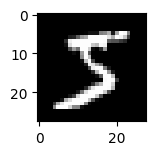

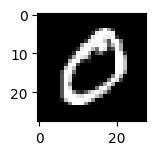

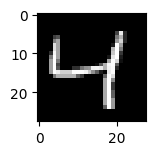

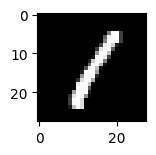

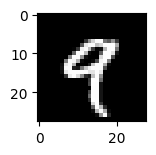

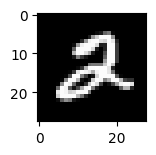

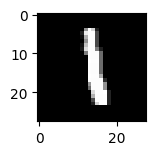

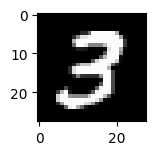

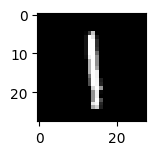

In [3]:
#Plotting the dataset
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

# Preprocessing

In [4]:
#Flatten the images to 1D array of 784 features (28x28)
train_X_flattened = train_X.reshape((-1, 28*28)).astype('float32')
test_X_flattened = test_X.reshape((-1, 28*28)).astype('float32')

#Define the scaler
scaler = MinMaxScaler()

#Fit and transform the training data
train_X_scaled = scaler.fit_transform(train_X_flattened)

#Only transform the test data
test_X_scaled = scaler.transform(test_X_flattened)

#Convert to PyTorch Tensors
X_train_tensor = torch.tensor(train_X_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(test_X_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(train_y, dtype=torch.long)
y_test_tensor = torch.tensor(test_y, dtype=torch.long)

#Spliting the data into train and validation sets for model training
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)

# Define the Neural Network

In [20]:
#Initializing Hyperparameters
epochs = 10
learning_rate = 0.05

#Record of loss for each epoch
loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(784, 128),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.10),

                                 torch.nn.Linear(128, 64),
                                 torch.nn.Linear(64, 10)
                                )

# 1.2 Loss Function
loss_CEL = nn.CrossEntropyLoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      #2. Forward Pass
      output = model_net3(X_train_tensor[i].unsqueeze(0))

      # 3. FeedForward Evaluation
      loss = loss_CEL(output, y_train_tensor[i].unsqueeze(0))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-20-43de4065a822>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.9538
--------------------------------------------------


Epoch 2 Average Loss: 1.0133
--------------------------------------------------


Epoch 3 Average Loss: 1.5582
--------------------------------------------------


Epoch 4 Average Loss: 1.5310
--------------------------------------------------


Epoch 5 Average Loss: 1.9068
--------------------------------------------------


Epoch 6 Average Loss: 1.6234
--------------------------------------------------


Epoch 7 Average Loss: 1.5214
--------------------------------------------------


Epoch 8 Average Loss: 1.5442
--------------------------------------------------


Epoch 9 Average Loss: 1.9552
--------------------------------------------------


Epoch 10 Average Loss: 1.8936
--------------------------------------------------



# Evaluating the model

In [21]:
#Save the trained model
torch.save(model_net3, 'model_net3.pkl')

In [22]:
#Lets load the model for inference
model_net3_trained = torch.load('model_net3.pkl')

#Set the Model to Evaluation Mode
model_net3_trained.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [23]:
#Initialize a variable to store the total loss
total_loss = 0.0

#Initialize a variable to store all the predictions
all_predictions = []

#Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    #Forward pass: compute predicted y by passing x to the model
    output = model_net3(X_test_tensor[i].reshape(-1, 784))

    #Compute and print loss
    loss = loss_CEL(output, y_test_tensor[i].unsqueeze(0))
    total_loss += loss.item()

    #Store the predictions
    all_predictions.append(output.detach().numpy())

#Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

#Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()

Average Loss on Test Set: 2.3455


# Hyperparameters

In [24]:
#Initializing Hyperparameters and added Dataloader for better and faster processing
epochs = 10
learning_rate = 0.05
batch_size = 64

# Dataset and DataLoader setup
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net4 = torch.nn.Sequential(torch.nn.Linear(784, 128),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.10),

                                 torch.nn.Linear(128, 64),
                                 torch.nn.Linear(64, 10)
                                )

# 1.2 Loss Function
loss_CEL = nn.CrossEntropyLoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net4.parameters(), lr=learning_rate)

# Record of loss for each epoch
loss_set = {}

# Training loop
for epoch in tqdm(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    for inputs, labels in train_loader:
        # Forward pass
        output = model_net4(inputs)

        # Loss calculation
        loss = loss_CEL(output, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

    # Calculate and display average loss for the epoch
        epoch_loss /= len(train_loader.dataset)

    # Store the loss for each epoch
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.0005
--------------------------------------------------


Epoch 2 Average Loss: 0.0004
--------------------------------------------------


Epoch 3 Average Loss: 0.0002
--------------------------------------------------


Epoch 4 Average Loss: 0.0002
--------------------------------------------------


Epoch 5 Average Loss: 0.0002
--------------------------------------------------


Epoch 6 Average Loss: 0.0002
--------------------------------------------------


Epoch 7 Average Loss: 0.0002
--------------------------------------------------


Epoch 8 Average Loss: 0.0001
--------------------------------------------------


Epoch 9 Average Loss: 0.0001
--------------------------------------------------


Epoch 10 Average Loss: 0.0000
--------------------------------------------------



# Evaluation after finetuning

In [25]:
#Save the trained model
torch.save(model_net4, 'model_net4.pkl')

In [26]:
#Lets load the model for inference
model_net4_trained = torch.load('model_net4.pkl')

#Set the Model to Evaluation Mode
model_net4_trained.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [28]:
#Initialize a variable to store the total loss
total_loss = 0.0

#Initialize a variable to store all the predictions
all_predictions1 = []

#Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    #Forward pass: compute predicted y by passing x to the model
    output = model_net4(X_test_tensor[i].reshape(-1, 784))

    #Compute and print loss
    loss = loss_CEL(output, y_test_tensor[i].unsqueeze(0))
    total_loss += loss.item()

    #Store the predictions
    all_predictions1.append(output.detach().numpy())

#Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

#Convert all_predictions to a tensor for further calculations
all_predictions_tensor1 = torch.tensor(all_predictions1).squeeze()

Average Loss on Test Set: 0.0979


In [29]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [30]:
# Convert softmax output to class labels
predicted_labels = torch.argmax(all_predictions_tensor1, dim=1)

Confusion matrix, without normalization
[[ 960    0    0    2    1    0    7    3    2    5]
 [   0 1121    2    2    0    1    4    0    5    0]
 [   9    4  989    7    4    0    5    5    9    0]
 [   1    0    3  994    0    3    0    5    3    1]
 [   2    0    4    0  959    0    3    2    0   12]
 [   2    1    1   14    2  859    7    1    1    4]
 [   5    3    0    0    4    6  938    0    2    0]
 [   0    8   12    4    1    0    0  994    0    9]
 [   4    0    4   11    5    5    6    4  932    3]
 [   4    3    0    8   14    5    1    9    4  961]]


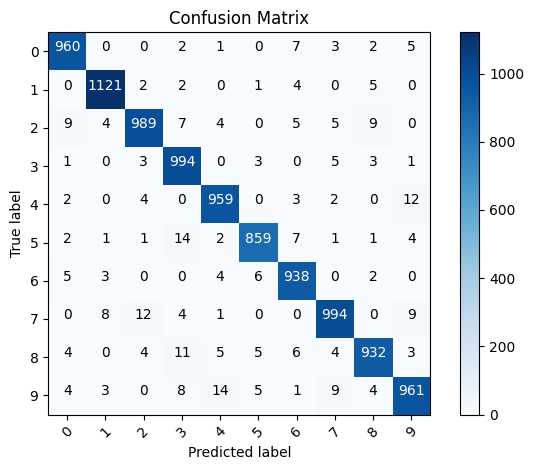

In [31]:
# Ensure y_test_tensor is a flat 1D tensor of class labels if it's not already
y_test_labels = y_test_tensor.numpy()

# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[str(i) for i in range(10)], title='Confusion Matrix')
plt.show()

In [32]:
# Sum of diagonal elements (True Positives for all classes)
correct_predictions = np.trace(cm)

# Total number of instances
total_predictions = np.sum(cm)

# Overall accuracy
accuracy = correct_predictions / total_predictions

In [33]:
# Print the parameters of all layers
for name, param in model_net4_trained.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([128, 784])
Values: 
tensor([[-0.0314, -0.0213, -0.0330,  ..., -0.0093, -0.0356,  0.0292],
        [-0.0094,  0.0315,  0.0093,  ..., -0.0204,  0.0089,  0.0098],
        [ 0.0338, -0.0285,  0.0263,  ...,  0.0301,  0.0173,  0.0256],
        ...,
        [ 0.0239, -0.0125,  0.0150,  ..., -0.0174,  0.0042, -0.0005],
        [-0.0021, -0.0302, -0.0316,  ...,  0.0096, -0.0264,  0.0300],
        [-0.0244,  0.0128, -0.0091,  ...,  0.0341, -0.0156, -0.0106]])

Layer: 0.bias
Size: torch.Size([128])
Values: 
tensor([ 0.0206,  0.1250,  0.0632, -0.0080,  0.0395,  0.0814, -0.0222,  0.0994,
         0.0204,  0.0200,  0.0135,  0.0609,  0.0013,  0.0421,  0.0243,  0.1505,
        -0.0199,  0.0075, -0.0392,  0.0347, -0.0166, -0.0661, -0.0129, -0.0626,
         0.0318, -0.0659, -0.0279, -0.0808,  0.0080,  0.0451, -0.0079,  0.0166,
         0.0307, -0.0604,  0.0111,  0.0378,  0.0373,  0.0613,  0.0351,  0.1292,
         0.0559, -0.0389,  0.0263,  0.0398,  0.0527, -0.0499,  0